<a href="https://colab.research.google.com/github/ramenwang/deep_learning_py/blob/master/weight_initialization/Weight_Initialization_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Study of Weight Initialization in Deep Learning

Weight initalization is significantly important in training a deep neural networks. The aim of weight initalization is to prevent the activation outputs from exploding or vanishing during the forward pass. In back propagation, neither an huge loss nor a extremely small loss can effectively train the model. The networks would take so long to converge if it is even possible to do so.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

%load_ext tensorboard

2.1.0


Make sure the tensorflow version is 2.0+; otherwise, reinstall tensorflow using pip

```
!pip uninstall tensorflow
!pip install tensorflow
```

In [2]:
# example of weight exploding
x = tf.random.normal(shape=[1,512], mean=.0, stddev=1.0)

for i in range(100):
    a = tf.random.normal(shape=[512, 512], mean=0.0, stddev=1.0)
    x = tf.matmul(x, a)
    m, std = tf.math.reduce_mean(x), tf.math.reduce_std(x)
    if tf.math.is_inf(std):
        print((i, m.numpy(), std.numpy()))
        break
    else:
        print((i, m.numpy(), std.numpy()))

(0, -0.961838, 24.16953)
(1, -13.598609, 520.645)
(2, 543.17664, 11750.547)
(3, -1684.8188, 267668.16)
(4, 172147.42, 5691851.0)
(5, 2966362.0, 127565290.0)
(6, -60063664.0, 2776320500.0)
(7, 488102530.0, 64079830000.0)
(8, 30241196000.0, 1414131500000.0)
(9, 363297000000.0, 31145148000000.0)
(10, -34386504000000.0, 715325660000000.0)
(11, 973020800000000.0, 1.6035983e+16)
(12, -1.6154825e+16, 3.4965442e+17)
(13, 3.9083168e+17, inf)


In [3]:
# example of weight exploding
x = tf.random.normal(shape=[1,512], mean=.0, stddev=1.0) * 0.01

for i in range(100):
    a = tf.random.normal(shape=[512, 512], mean=0.0, stddev=1.0) * 0.01
    x = tf.matmul(x, a)
    m, std = tf.math.reduce_mean(x), tf.math.reduce_std(x)
    if std.numpy() == 0.0:
        print((i, m.numpy(), std.numpy()))
        break
    else:
        print((i, m.numpy(), std.numpy()))

(0, -6.1325263e-06, 0.0022776912)
(1, 3.6898382e-06, 0.00048715592)
(2, 9.482917e-06, 0.0001084552)
(3, 1.4201868e-07, 2.4935547e-05)
(4, -6.305007e-08, 5.572118e-06)
(5, 4.956088e-08, 1.2065258e-06)
(6, 2.2222627e-08, 2.715249e-07)
(7, -4.2651394e-09, 6.25037e-08)
(8, -4.3653953e-10, 1.2736951e-08)
(9, 1.7413396e-10, 3.2849283e-09)
(10, 4.7104976e-12, 7.4081447e-10)
(11, 6.114569e-12, 1.6897835e-10)
(12, -1.0751213e-12, 4.1018897e-11)
(13, 6.105934e-14, 9.305734e-12)
(14, -3.4720904e-14, 2.018242e-12)
(15, -1.6318007e-14, 4.6246584e-13)
(16, -3.5488434e-15, 1.0337342e-13)
(17, 9.739867e-16, 2.2177313e-14)
(18, 5.092885e-18, 4.9002287e-15)
(19, -3.115562e-17, 1.1094613e-15)
(20, 9.6711674e-18, 2.473206e-16)
(21, -3.9281267e-19, 5.329897e-17)
(22, 1.0898535e-19, 1.2336134e-17)
(23, 1.8682431e-19, 2.6766589e-18)
(24, 1.8861678e-20, 6.164502e-19)
(25, -6.7400397e-21, 1.4030843e-19)
(26, 1.8983844e-21, 3.2658945e-20)
(27, 4.9708385e-22, 7.225329e-21)
(28, 1.0632677e-24, 1.602679e-21)
(29, 

In order to  understand how the exploding and vanishing happens, let's first take a look at the forward matrix multiplication at each layer. Assuming at a layer, we had an input in_i and a weight matrix w_i:

In [4]:
in_i, w_i = tf.random.normal([1,625], mean=0., stddev=1.), tf.random.normal([625,10000], mean=0., stddev=1.)
out_i = tf.matmul(in_i, w_i)
m, std = tf.math.reduce_mean(out_i), tf.math.reduce_std(out_i)
print(f'The mean is {m}, and the standard deviation is {std}')

The mean is -0.00637435307726264, and the standard deviation is 26.03536605834961


We can find that mean is close to zero, and the standard deviation is close to 25, which is the square root of 625. This is not a coincidence but a fact that each of the element in out_i is the summation of the products between every in_i element and every w_i element in the corresponding column; therefore, the expected mean remains 0 and the expected variance is 1 * 625 while each elements are drew from standard normal distribution.

To combat this issue, we can initalize the weight from a normal distribution with the deviation of square root of 1 / input_sizes. In this case, we can define the standard deviation as 1 / 25

In [5]:
in_i, w_i = tf.random.normal([1,625], mean=0., stddev=1.), tf.random.normal([625,10000], mean=0., stddev=(1/25))
out_i = tf.matmul(in_i, w_i)
m, std = tf.math.reduce_mean(out_i), tf.math.reduce_std(out_i)
print(f'The mean is {m}, and the standard deviation is {std}')

The mean is -0.01951034925878048, and the standard deviation is 0.9791644811630249


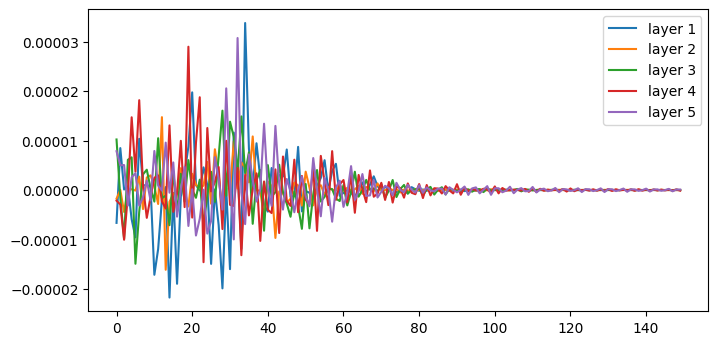

In [6]:
# define a function for testing gradients for different intializer
def plot_gradient_5lyr(x, y, w1, w2, w3, w4, w5):
    lr = 0.001

    m1, m2, m3, m4, m5 = [], [], [], [], []
    n_epoachs = 150
    for epoach in range(n_epoachs):
        with tf.GradientTape() as g:
            g.watch([w1, w2, w3, w4, w5])
            # forward
            x = tf.matmul(x, w1)
            x = tf.matmul(x, w2)
            x = tf.matmul(x, w3)
            x = tf.matmul(x, w4)
            x = tf.matmul(x, w5)
            loss = tf.reduce_mean(tf.square(y - x))
            g_w = g.gradient(loss, [w1, w2, w3, w4, w5])
            # update weights
            w1 -= g_w[0] * lr
            w2 -= g_w[1] * lr
            w3 -= g_w[2] * lr
            w4 -= g_w[3] * lr
            w5 -= g_w[4] * lr
            # get mean gradients
            m1.append(np.mean(g_w[0]))
            m2.append(np.mean(g_w[1]))
            m3.append(np.mean(g_w[2]))
            m4.append(np.mean(g_w[3]))
            m5.append(np.mean(g_w[4]))

    # plot gradients at each layer
    plt.figure(figsize=(8, 4), dpi=100)
    plt.plot(np.arange(n_epoachs), m1, '-', label='layer 1')
    plt.plot(np.arange(n_epoachs), m2, '-', label='layer 2')
    plt.plot(np.arange(n_epoachs), m3, '-', label='layer 3')
    plt.plot(np.arange(n_epoachs), m4, '-', label='layer 4')
    plt.plot(np.arange(n_epoachs), m5, '-', label='layer 5')
    plt.legend(loc="best")
    plt.show()

# check how this technique performs in a 5 layer gradient descent
x = tf.random.normal([1,625], mean=0., stddev=1.0) # input x
y = tf.random.normal([1,625], mean=0., stddev=1.0) # output y
# initial weights based on above techniques
w1 = tf.random.normal([625,625], mean=0., stddev=(1/25))
w2 = tf.random.normal([625,625], mean=0., stddev=(1/25))
w3 = tf.random.normal([625,625], mean=0., stddev=(1/25))
w4 = tf.random.normal([625,625], mean=0., stddev=(1/25))
w5 = tf.random.normal([625,625], mean=0., stddev=(1/25))

plot_gradient_5lyr(x, y, w1, w2, w3, w4, w5)

# [Xavier](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf) 
Xavier initializes the weight matrix based on uniform distribution with a bound of $\pm \frac{\sqrt{6}}{\sqrt{n_i + n_{i+1}}}$, where $n_i$ and $n_{i+1}$ are the number of input and output connections.

In [7]:
# check in forward propagation
x = tf.random.normal([1,625], mean=0., stddev=1.0) # input x
xavier_bound = np.sqrt(6.0) / np.sqrt(625.0 + 625)

for i in range(100):
    w = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)
    x = tf.matmul(x, w)
    if i % 10 == 0:
        m, std = tf.math.reduce_mean(x).numpy(), tf.math.reduce_std(x).numpy()
        print((i, m, std))

(0, 0.051306505, 1.0226407)
(10, 0.07381795, 1.0186762)
(20, 0.013239559, 1.0529343)
(30, -0.018740911, 0.9958783)
(40, -0.019109078, 0.8926141)
(50, 0.023241922, 0.9488437)
(60, -0.013454631, 0.8592531)
(70, -0.060458116, 0.9662498)
(80, 0.042681504, 0.9446763)
(90, 0.06585385, 1.0296825)


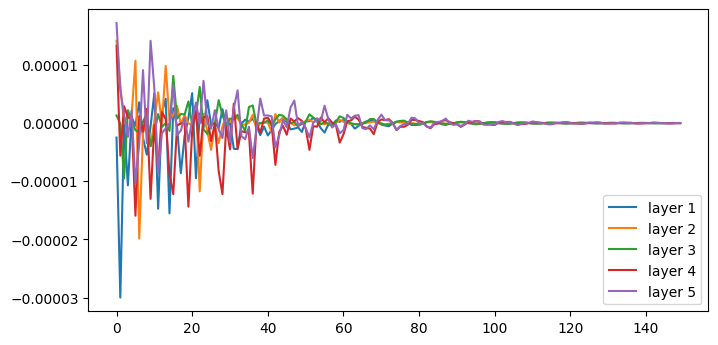

In [9]:
# check in 5 layer gradient descent
x = tf.random.normal([1,625], mean=0., stddev=1.0) # input x
xavier_bound = np.sqrt(6.0) / np.sqrt(625.0 + 625)
w1 = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)
w2 = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)
w3 = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)
w4 = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)
w5 = tf.random.uniform([625, 625], minval=-xavier_bound, maxval=xavier_bound)

plot_gradient_5lyr(x, y, w1, w2, w3, w4, w5)